In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import string
from wordcloud import WordCloud as WC
from wordcloud import STOPWORDS
from collections import Counter
import ntlk
from nltk.corpus import stopwords
nltk.download('stopwords')

ModuleNotFoundError: No module named 'ntlk'

In [65]:
pip install ntlk

  ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('train.csv')

In [3]:
fake=df[df['label']==1]
real=df[df['label']==0]

In [4]:
print(len(fake))

25819


In [5]:
print(len(real))

225055


array([<matplotlib.axes._subplots.AxesSubplot object at 0x108cad860>,
      dtype=object)

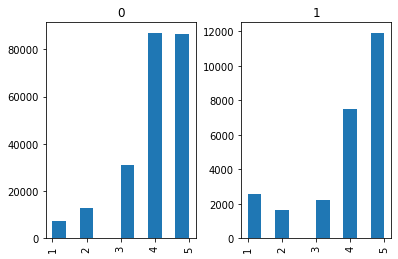

In [5]:
hist=df['rating'].hist(by=df['label'])
hist

In [6]:
#% of real reviews that are unique user_ids
len(np.unique(real['user_id']))/len(real)

0.4668814289840261

In [18]:
#% of fake reviews that are unique user_ids
len(np.unique(fake['user_id']))/len(fake)

0.8135868933730973

In [20]:
#% of real reviews that are unique prod_ids
len(np.unique(real['prod_id']))/len(real)

0.004101219701850659

In [21]:
#% of real reviews that are unique prod_ids
len(np.unique(fake['prod_id']))/len(fake)

0.03497424377396491

In [11]:
real_revs=list(real['review'])
words=real_revs[0].split()
words = [word.lower() for word in words]
table = str.maketrans('', '', string.punctuation)
wordss=[w.translate(table) for w in words]
wordsss=' '.join([i for i in wordss])
wordsss

'i had the braised lamb sandwich and was one of the best sandwiches of my life do yourself a favour and try this place friendly service and cosy atmosphere'

In [36]:
real_revs[0].translate(string.punctuation)

'I had the braised lamb sandwich and was one of the best sandwiches of my life. Do yourself a favour and try this place! Friendly service and cosy atmosphere.'

In [62]:
#define function to get words from reviews
def str_to_words(strings):
    content=[]
    full_content=[]
    for item in strings:
        #split string into words
        words=item.split()
        #remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        words=[w.translate(table) for w in words]
        #make all words lowercase
        words = [word.lower() for word in words]
        words=[word for word in words if not word in stopwords.words()]
        content.append(words)
        words_full=' '.join([i for i in wordss])
        full_content.append(words_full)
    full=' '.join([i for i in full_content])
    return content,full
        

In [63]:
fake_words=str_to_words(fake['review'])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/gabriellahurtado/nltk_data'
    - '//anaconda3/nltk_data'
    - '//anaconda3/share/nltk_data'
    - '//anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [16]:
one_string=fake_words[1]

In [57]:
def bow(words):
    bow=[]
    for item in words:
        word_counter=Counter()
        for word in item:
            word_counter[word]+=1
        #bow.append(word_counter)
    return word_counter

In [58]:
fw=bow(fake_words[0])

In [59]:
fw

Counter({'first': 1,
         'and': 3,
         'last': 1,
         'time': 3,
         'we': 1,
         'try': 1,
         'this': 5,
         'place': 2,
         'pizza': 3,
         'crust': 1,
         'was': 2,
         'hard': 1,
         'as': 1,
         'a': 4,
         'rock': 1,
         'also': 1,
         'took': 1,
         'too': 1,
         'long': 2,
         'to': 5,
         'arrive': 1,
         'my': 1,
         'boyfriend': 1,
         'i': 4,
         'ordered': 1,
         'the': 5,
         'arugula': 1,
         'salads': 1,
         'start': 1,
         'with': 1,
         'our': 2,
         'suggestion': 1,
         'dont': 1,
         'order': 1,
         'salad': 2,
         'from': 1,
         'unless': 1,
         'you': 1,
         'like': 3,
         'bland': 1,
         'tasteless': 1,
         'back': 1,
         'pizzathe': 1,
         'sausage': 1,
         'on': 2,
         'camp': 1,
         'randall': 1,
         'smelled': 1,
         'dise

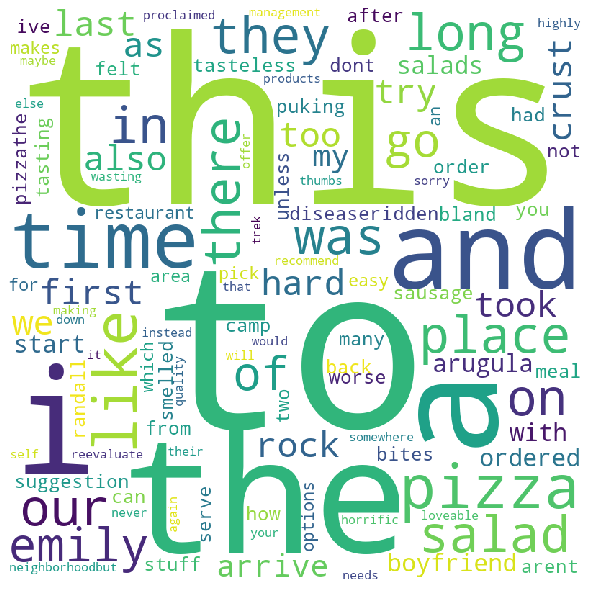

In [60]:
stopwords = set(STOPWORDS) 
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size =5).generate_from_frequencies(fw) 
  
# plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0)   